In [75]:
import sys

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.GeometryUtils as gu

tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

### Dataset Structure:

In [76]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.484717,0.012237,0.489652,0.896157,0.875424,0.540778,0.455632,0.691658,0.077571,0.338527,...,0.983126,0.936813,0.251269,0.795482,0.301649,0.074090,0.188537,0.280026,0.004833,1
1,0.902221,0.548340,0.083062,0.650585,0.865612,0.592899,0.552823,0.327926,0.519296,0.175177,...,0.930968,0.508409,0.575450,0.058712,0.249412,0.681533,0.567752,0.117896,0.008180,1
2,0.832287,0.108010,0.671027,0.584902,0.560774,0.201920,0.084311,0.008707,0.410984,0.738802,...,0.156509,0.246676,0.594833,0.736046,0.288370,0.919604,0.209291,0.965392,0.009256,1
3,0.199921,0.761789,0.249816,0.734250,0.304716,0.942848,0.785201,0.710240,0.506736,0.765636,...,0.353138,0.115655,0.606263,0.974300,0.699974,0.412395,0.843210,0.357626,0.004656,1
4,0.892879,0.911970,0.504787,0.411754,0.936125,0.947700,0.300268,0.466237,0.929691,0.146000,...,0.511650,0.110623,0.091211,0.861190,0.377044,0.027986,0.121851,0.204174,0.007656,1


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [77]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.0
mean,0.499829,0.499684,0.501093,4.996968e-01,0.500593,0.498450,0.501049,0.499514,5.023032e-01,0.500207,...,0.500273,0.499821,0.499777,0.500455,0.499175,0.499689,0.499648,0.501211,4.999396e-03,1.0
std,0.296818,0.296670,0.296367,2.968435e-01,0.297134,0.296382,0.296689,0.296691,2.965061e-01,0.297234,...,0.297434,0.297086,0.297316,0.296350,0.297377,0.296116,0.297113,0.296260,2.887506e-03,0.0
min,0.000007,0.000004,0.000003,1.708977e-07,0.000003,0.000007,0.000002,0.000007,6.998889e-07,0.000008,...,0.000024,0.000016,0.000003,0.000072,0.000026,0.000012,0.000004,0.000007,9.330000e-14,1.0
25%,0.234345,0.234044,0.237554,2.350543e-01,0.236431,0.234604,0.237166,0.235877,2.390803e-01,0.234422,...,0.234793,0.234676,0.235565,0.236764,0.234086,0.235573,0.234043,0.238210,2.500079e-03,1.0
50%,0.500330,0.500612,0.502242,4.984215e-01,0.499346,0.498150,0.501954,0.498378,5.013408e-01,0.501747,...,0.500749,0.499902,0.500187,0.500937,0.498349,0.498651,0.500432,0.500849,5.000040e-03,1.0
75%,0.764515,0.762941,0.764316,7.649620e-01,0.765503,0.762761,0.765987,0.763793,7.655915e-01,0.764533,...,0.766263,0.765114,0.764762,0.763215,0.764903,0.763547,0.764173,0.765674,7.499947e-03,1.0
max,0.999995,0.999977,0.999970,9.999613e-01,0.999989,1.000000,0.999981,0.999999,9.999839e-01,0.999982,...,0.999989,1.000000,0.999995,0.999971,0.999999,0.999994,0.999999,0.999981,9.999812e-03,1.0


#### Class Balance

In [78]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 0.00%
Percentage of entries with HasIntersection = 1: 100.00%


#### Coordinates precision

In [79]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 8 decimal places
Max coordinate precision in the dataset: 16 decimal places


#### Coordinates distribution

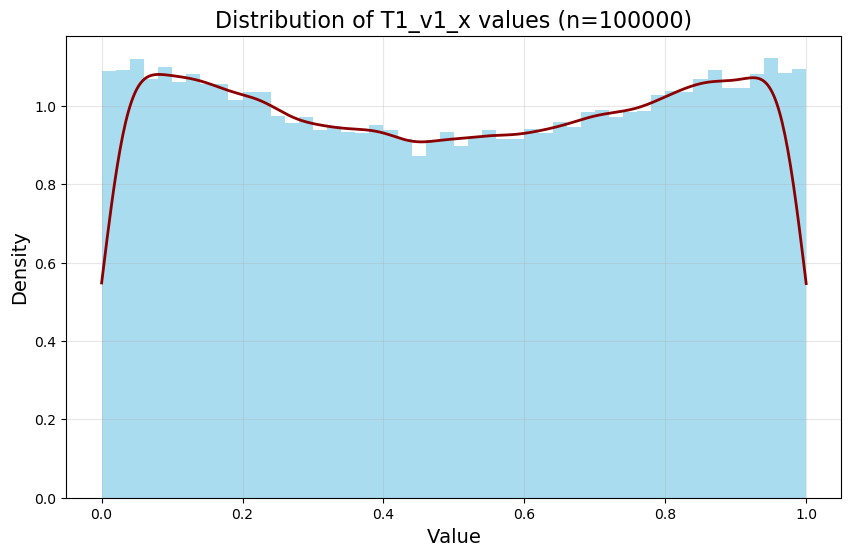

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array and ensure 1D structure
data = np.ravel(tetrahedron_dataset['T1_v1_x'].to_numpy(copy=False))

# Create plot using matplotlib directly
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)

# Add KDE using scipy instead of seaborn
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 500)
plt.plot(x, kde(x), color='darkred', lw=2)

# Formatting
plt.title(f'Distribution of T1_v1_x values (n={len(data)})', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

#### Tetrahedron volume distribution

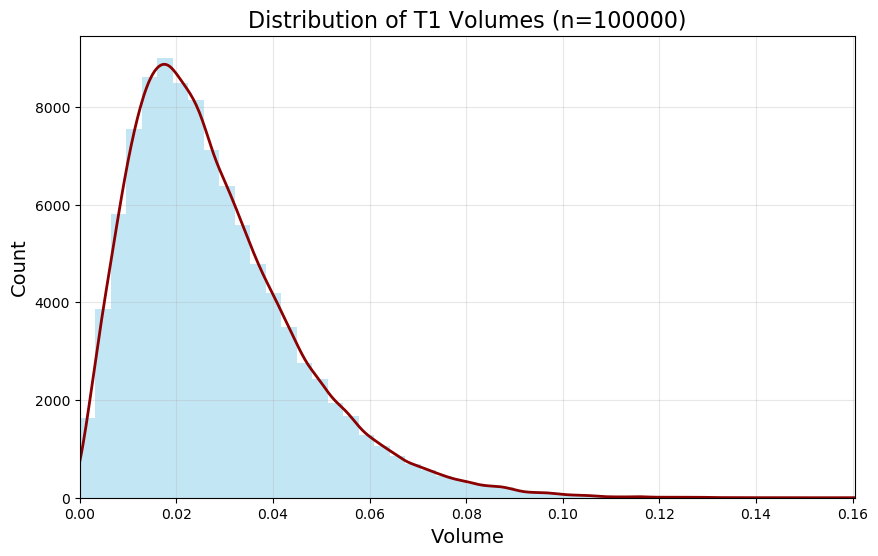

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

t1_volumes = []
for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())

# Convert to numpy array and ensure 1D structure
volumes = np.array(t1_volumes).ravel()

# Create plot using matplotlib directly
plt.figure(figsize=(10, 6))

# Histogram
counts, bins, _ = plt.hist(volumes, bins=50, color='skyblue', alpha=0.5)

# KDE using scipy
kde = gaussian_kde(volumes)
x = np.linspace(volumes.min(), volumes.max(), 500)
plt.plot(x, kde(x)*len(volumes)*(bins[1]-bins[0]), color='darkred', lw=2)

# Formatting
plt.title(f'Distribution of T1 Volumes (n={len(volumes)})', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0, volumes.max())
plt.grid(True, alpha=0.3)
plt.show()

#### Intersection volume distribution

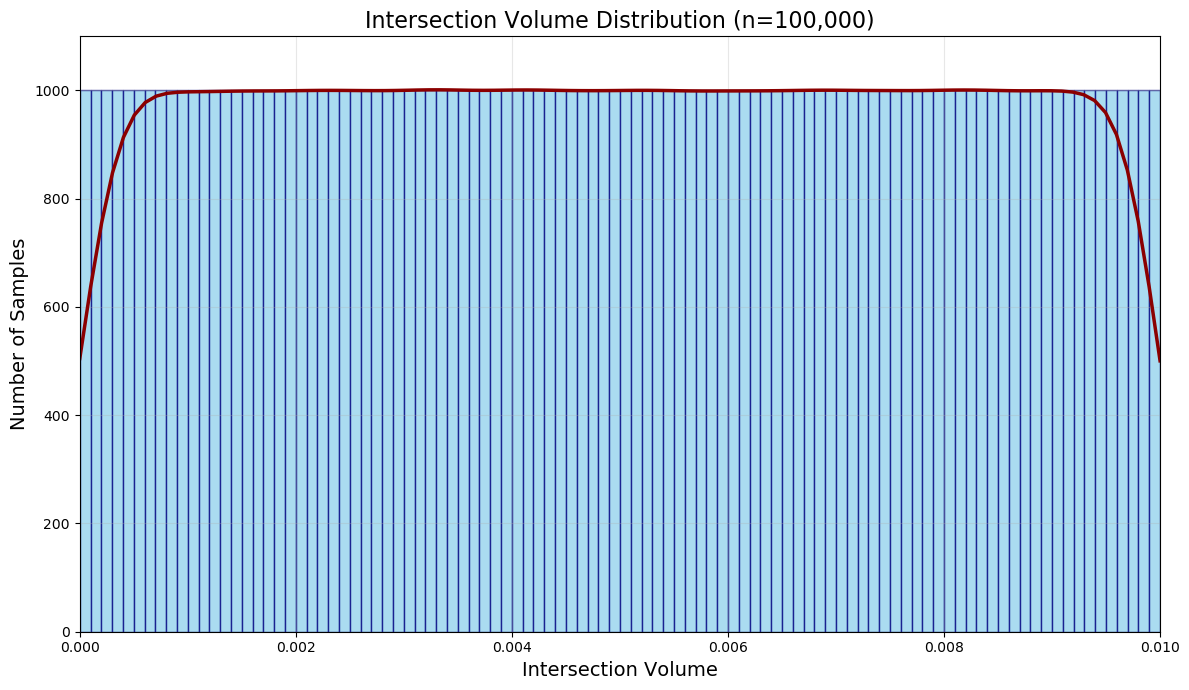

In [87]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]
volumes = intersecting_cases['IntersectionVolume'].to_numpy()
n_bins = 100
plt.figure(figsize=(12, 7))

# Use actual counts instead of density
counts, bins, patches = plt.hist(volumes, 
                                bins=n_bins,
                                range=(0, 0.01),
                                color='skyblue',
                                edgecolor='navy',
                                alpha=0.7)

# Properly scaled KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(volumes)
x = np.linspace(0, 0.01, n_bins)
bin_width = bins[1] - bins[0]
plt.plot(x, kde(x) * len(volumes) * bin_width,  # Scale to match counts
         color='darkred', 
         lw=2.5)

plt.title(f'Intersection Volume Distribution (n={len(volumes):,})', fontsize=16)
plt.xlabel('Intersection Volume', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)  # Changed to count axis
plt.xlim(0, 0.01)
plt.ylim(0, counts.max() * 1.1)  # Add 10% headroom
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()